# Lesson 6: Continuing Computations

## Contents
- Selecting data (cont.)
- Aggregating over a dimension (cont.)
- Masking and filtering data
- Practicing it all: Calculating NDVI

## Opening PACE Data

This script opening PACE data demonstrates a few high level concepts about opening data:
1. Using the `earthaccess` library to search for data
2. Using the `earthaccess` library to open data
3. Streaming data from the cloud
4. Working with lazily loaded data
5. Stacking individual data files into data cubes

It's okay if you don't understand every line of this code block below. The first step is to understand what the code does at a high level, and if you need to do something similar you can come back to this code later in the summer.

:::{admonition} Library
[`earthaccess`](https://earthaccess.readthedocs.io/en/latest/) is a library for programatically downloading data from NASA. It's a great library to look into if you know you'll want to download lots of NASA data. https://earthaccess.readthedocs.io/en/latest/
:::

**Run the cells below before working on the warm up questions**

In [7]:
from datetime import datetime

import earthaccess
import xarray as xr

In [8]:
# Login to Earthdata
auth = earthaccess.login(persist=True)

Search for PACE images matching the time range and data product

In [9]:
# Specify the time period for the search (start_date, end_date)
tspan = ("2025-05-01", "2025-06-01")

# Search for data files ("granules") that match the criteria
results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_CHL_NRT",  # Name of the data product
    temporal=tspan,  # Time range
    granule_name="*.DAY.*.0p1deg.*",  # Filter to only return granules with matching name pattern
    # count=5,
)
print('found', len(results), 'results')

found 31 results


Create connections to the cloud data files

In [10]:
# Create a connection to the cloud data files
paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/31 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/31 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/31 [00:00<?, ?it/s]

Read in the data

In [11]:
# Define a function to prepare the data
def preprocess_func(input_ds):
    # Parse the date of the image from the file attributes
    date_start = input_ds.attrs['product_name'].split('.')[1]
    date_start = datetime.strptime(date_start, '%Y%m%d')
    # Get just the chlorophyll-a DataArray
    out = input_ds.chlor_a
    # Return the DataArray, with date added as a dimension
    return out.expand_dims({"date": [date_start]})

In [12]:
# Open the datafiles that were returned in the search
chlorophyll = xr.open_mfdataset(
    paths,
    combine="nested",
    concat_dim="date",
    preprocess=preprocess_func
)
chlorophyll

<xarray.DataArray 'chlor_a' (date: 31, lat: 1800, lon: 3600)> Size: 804MB
dask.array<concatenate, shape=(31, 1800, 3600), dtype=float32, chunksize=(1, 512, 1024), chunktype=numpy.ndarray>
Coordinates:
  * date     (date) datetime64[ns] 248B 2025-05-01 2025-05-02 ... 2025-06-01
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

### Practice

Modify the code above to get data from January 1st 2025 to June 1st 2025.

:::{admonition} Vocabulary
:class: tip
**Lazy loading:** The practice of not reading all the data when initially opening a large datafile. You can problem Python to read the data using `.load()`. The opposite of lazy loading (where data is opened immediately) is **eager loading**.
:::

`````{admonition} Data Opening Checklist (First 3 Steps)
:class: tip
1. What variables or measurements are available in this dataset?
2. How is the dataset organized? What is the shape or size?
3. What spatial and/or temporal range does this dataset cover?
`````

**Notes**
1. _
2. _
3. _


## Selecting Data (Review and Practice)

(and lazy loading)

### Practice A

Subset the data to include only the 1st date of data. How many dimensions does the output DataArray have?

### Practice B

Subset the data to include only the data on February 16th, 2025. Plot the data.

### Practice (Challenge)

Find the data values at 3.12 degrees North and 20.06 degrees East. How many dimensions does the output have?

### Practice (Challenge)

Find the data values at 8.12 degrees South and 68.1 degrees East on May 23rd, 2025. What is the value of chlorophyll at that point?

:::{admonition} Hint
:class: note, dropdown
Recall that this data has been lazily loaded, meaning the data values have not been read yet. So, if you want to view the actual data value you'll need to load the data with `.load()`.
:::

:::{admonition} 📝 Check your understanding
:class: tip

🗳️🗳️🗳️

Write a line of code to subset the whole `chlorophyll` dataset to 0-60 degrees North and 80-10 degrees East.

:::

## Aggregating over a dimension (Review and Practice)

### Example 1

January 1st global data

In [15]:
# Use just January 1st as an example
jan1 = chlorophyll.isel(date=0)

In [16]:
jan1.load()

<xarray.DataArray 'chlor_a' (lat: 1800, lon: 3600)> Size: 26MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    date     datetime64[ns] 8B 2025-05-01
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

In [17]:
jan1.mean()

<xarray.DataArray 'chlor_a' ()> Size: 4B
array(0.4267937, dtype=float32)
Coordinates:
    date     datetime64[ns] 8B 2025-05-01

In [18]:
jan1.mean(dim='lon')

<xarray.DataArray 'chlor_a' (lat: 1800)> Size: 7kB
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    date     datetime64[ns] 8B 2025-05-01
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95

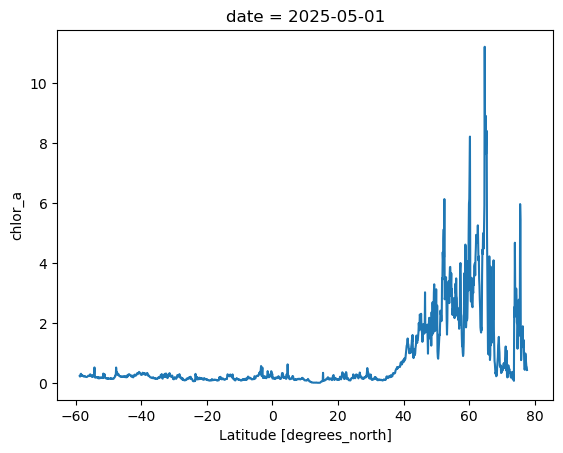

In [19]:
jan1.mean(dim='lon').plot()

### Example 2
Atlantic Ocean
1. Subset to the Atlantic Ocean region
2. Take the spatial mean at each observation date
3. Plot the result

In [78]:
atlantic_ocean = chlorophyll.sel(lat=slice(70, 20), lon=slice(-75, -10))

In [80]:
atlantic_ocean

<xarray.DataArray 'chlor_a' (date: 150, lat: 500, lon: 650)> Size: 195MB
dask.array<getitem, shape=(150, 500, 650), dtype=float32, chunksize=(1, 312, 650), chunktype=numpy.ndarray>
Coordinates:
  * date     (date) datetime64[ns] 1kB 2025-01-01 2025-01-04 ... 2025-06-01
  * lat      (lat) float32 2kB 69.95 69.85 69.75 69.65 ... 20.25 20.15 20.05
  * lon      (lon) float32 3kB -74.95 -74.85 -74.75 ... -10.25 -10.15 -10.05
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

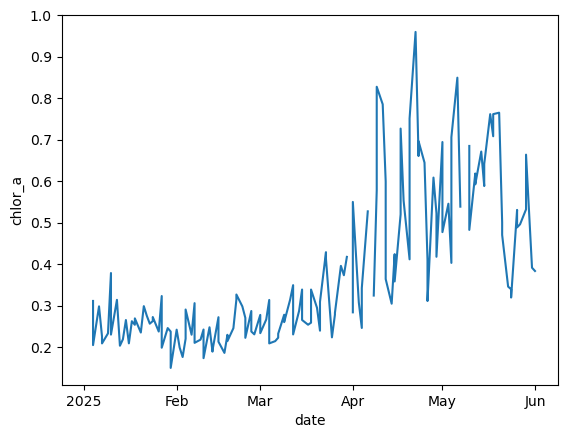

In [84]:
atlantic_ocean.mean(dim=['lat', 'lon']).plot()

What is this plot telling us, scientifically?

:::{admonition} 📝 Check your understanding
:class: tip

🗳️🗳️🗳️

The starting `atlantic_ocean` DataArray had 3 dimensions. How many dimensions does the output of `atlantic_ocean.mean(dim=['lat', 'lon'])` have?

- A) 0
- B) 1
- C) 2
- D) 3
- E) none of the above

:::

## Filtering / Masking

In [1]:
7 < 10

True

In [23]:
jan1 > 3

<xarray.DataArray 'chlor_a' (lat: 1800, lon: 3600)> Size: 6MB
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
    date     datetime64[ns] 8B 2025-05-01
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0

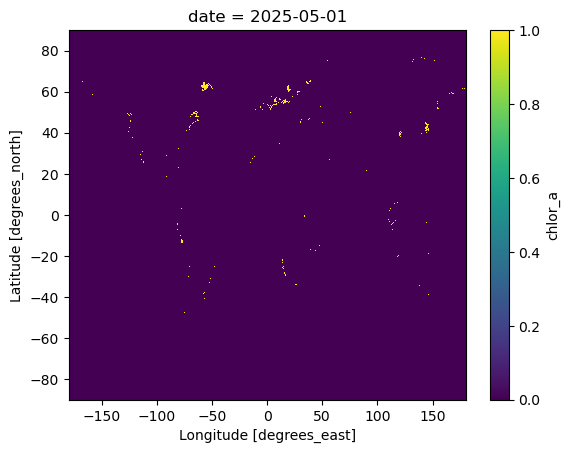

In [24]:
(jan1 > 3).plot()

In [26]:
jan1.where(jan1 > 3)

<xarray.DataArray 'chlor_a' (lat: 1800, lon: 3600)> Size: 26MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    date     datetime64[ns] 8B 2025-05-01
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

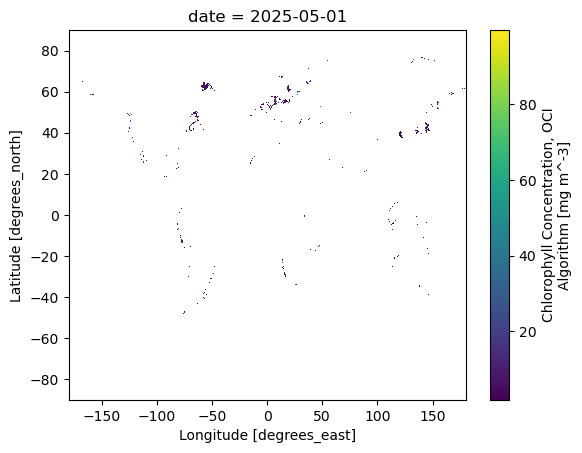

In [28]:
jan1.where(jan1 > 3).plot()

Masking with multiple conditions:

In [29]:
jan1.where((jan1 > 2) & (jan1 < 4))

<xarray.DataArray 'chlor_a' (lat: 1800, lon: 3600)> Size: 26MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    date     datetime64[ns] 8B 2025-05-01
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

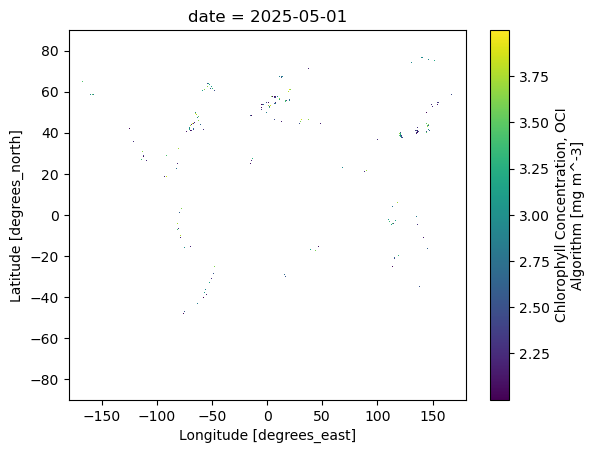

In [30]:
jan1.where((jan1 > 2) & (jan1 < 4)).plot()

Using `.where()` to filter data: including the `drop` argument.

In [ ]:
chlorophyll.date.dt.month == 5

In [42]:
may_chlor = chlorophyll.where(chlorophyll.date.dt.month == 5, drop=True)

In [43]:
may_chlor

<xarray.DataArray 'chlor_a' (date: 30, lat: 1800, lon: 3600)> Size: 778MB
dask.array<where, shape=(30, 1800, 3600), dtype=float32, chunksize=(1, 512, 1024), chunktype=numpy.ndarray>
Coordinates:
  * date     (date) datetime64[ns] 240B 2025-05-01 2025-05-02 ... 2025-05-31
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

:::{admonition} 📝 Check your understanding
:class: tip

🗳️🗳️🗳️

Write a line of code to convert any values of chlorophyll above 80 degrees North out of the `jan1` DataArray. (Bonus: Replace the values north of 80 degrees with -100.)

Hint: check out the available arguments (parameters) on [the documentation page for `xr.DataArray.where()`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.where.html)

:::

## Question Answers

### Selecting Data

### Practice A

Subset the data to include only the 1st date of data. How many dimensions does the output DataArray have?

In [89]:
chlorophyll.isel(date=0)
# DataArray has two dimensions (lat and lon)

<xarray.DataArray 'chlor_a' (lat: 1800, lon: 3600)> Size: 26MB
dask.array<getitem, shape=(1800, 3600), dtype=float32, chunksize=(512, 1024), chunktype=numpy.ndarray>
Coordinates:
    date     datetime64[ns] 8B 2025-01-01
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

### Practice B

Subset the data to include only the data on February 16th, 2025. Plot the data.

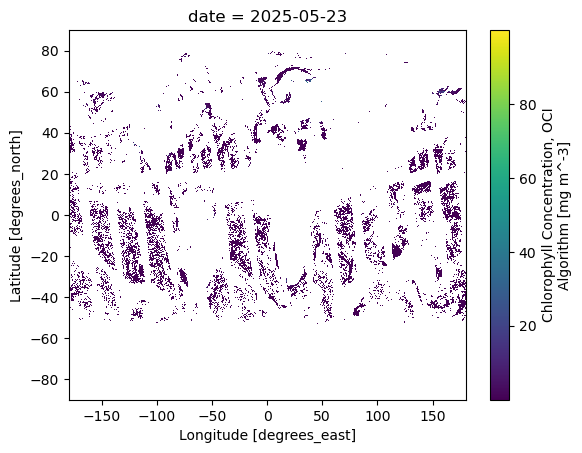

In [91]:
chlorophyll.sel(date='2025-05-23').plot()

### Practice (Challenge)

Find the data values at 3.12 degrees North and 20.06 degrees East. How many dimensions does the output have?

In [92]:
chlorophyll.sel(lat=3.12, lon=80.06, method='nearest')

<xarray.DataArray 'chlor_a' (date: 150)> Size: 600B
dask.array<getitem, shape=(150,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * date     (date) datetime64[ns] 1kB 2025-01-01 2025-01-03 ... 2025-06-01
    lat      float32 4B 3.15
    lon      float32 4B 80.05
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

### Practice (Challenge)

Find the data values at 8.12 degrees South and 68.1 degrees East on May 23rd, 2025. What is the value of chlorophyll at that point?

:::{admonition} Hint
:class: note, dropdown
Recall that this data has been lazily loaded, meaning the data values have not been read yet. So, if you want to view the actual data value you'll need to load the data with `.load()`.
:::

In [94]:
chlorophyll.sel(
    lat=-8.12, lon=68.10, date='2025-05-23',
    method='nearest'
).load()

<xarray.DataArray 'chlor_a' ()> Size: 4B
array(0.12812965, dtype=float32)
Coordinates:
    date     datetime64[ns] 8B 2025-05-23
    lat      float32 4B -8.15
    lon      float32 4B 68.05
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0